# Forecasting Customer Churn 

# Content

* [Introduction](#intro)
* [Initialization](#initialization)
* [Data Exploration](#data_exploration)
	* [`df_contract`](#df_contract)
		* [Conclusion](#conclusion)
	* [`df_internet`](#df_internet)
		* [Conclusion](#conclusion)
	* [`df_personal`](#df_personal)
		* [Conclusion](#conclusion)
	* [`df_phone`](#df_phone)
		* [Conclusion](#conclusion)
* [Data Preprocessing](#data_preprocessing)
	* [Fixing Column Names](#fixing_column_names)
		* [`df_contract`](#df_contract)
		* [`df_internet`](#df_internet)
		* [`df_personal`](#df_personal)
		* [`df_phone`](#df_phone)
	* [Converting Data Types](#converting_data)
		* [`df_contract`](#df_contract)
	* [Merging Datasets](#merging)
	* [Feature Engineering](#feature_engineering)
* [Exploratory Data Analysis (EDA)](#eda)
	* [What is the most popular contract type?](#eda)
	* [Which contract plans brings in the most revenue?](#eda)
	* [Which contract plan has the highest churn rate?](#eda)
	* [Is there a relationship between the number of services a customer has and customer churn?](#eda)
	* [Is there a difference in churn rate between male customers and female customers?](#eda)
	* [Is there a high percentage of senior citizens leaving Interconnect?](#eda)
	* [Conclusion](#conclusion)
* [Working with Models](#models)
	* [Feature Preparation](#feature_prep)
		* [Conclusion](#conclusion)
	* [Examining the Balance of Classes](#class_balance)
		* [Oversampling (Upsampling)](#upsampling)
	* [Defining Evaluation Metrics](#metric_eval)
	* [Model Training](#model_training)
		* [Model 0 – Constant](#model_0)
		* [Model 1 – Logistic Regression](#model_1)
		* [Model 2 – Decision Tree Classifier](#model_2)
		* [Model 3 – Random Forest Classifier](#model_3)
		* [Model 4 – LightGBM Classifier](#model_4)
		* [Model 5 – XGBoost Classifier](#model_5)
		* [Model 6 – CatBoost Classifier](#model_6)
* [Model Analysis](#model_analysis)
	* [Conclusion](#conclusion)
* [Final Testing](#final_testing)
	* [Conclusion](#conclusion)
* [Findings](#findings)


## Introduction 

Interconnect, a telecom operator, wants to forecast their churn of clients. If it is discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of thier clientele's personal data, including information about the plans and contracts Interconnect mainly provides two types of services:


1.   Landline communication - the telephone can be connected to several lines simultaneously
2.   Internet - the network can be set up via a telephone line (DSL, digital subscriber line) or through a fiber optic cable

Some other services the company provides includes:
* Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*) 
* A dedicated technical support line (*TechSupport*)
* Cloud file storage and data backup (*OnlineBackup*)
* TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can either choose a monthly payment of sign a 1- or 2- year contract. They can use various payment methods and receive an electronic invoice after a transaction.


**Data Description:**
* `contract.csv` - contract information 
* `personal.csv` - the client's personal data
* `internet.csv` - information about Internet services
* `phone.csv` - information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client. 

**Objectives:**
* Build a model to predict customer churn 


## Initialization

In [99]:
# Loading all libraries
import pandas as pd 

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn.utils import shuffle

from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.pipeline import make_pipeline

from sklearn.preprocessing import OrdinalEncoder, StandardScaler

from sklearn import metrics
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_curve



from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier

from xgboost import XGBClassifier

!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Loading the data
try:
  df_contract = pd.read_csv('contract.csv')
  df_internet = pd.read_csv('internet.csv')
  df_personal = pd.read_csv('personal.csv')
  df_phone = pd.read_csv('phone.csv')

except:
  df_contract = pd.read_csv('/datasets/contract.csv')
  df_internet = pd.read_csv('/datasets/internet.csv')
  df_personal = pd.read_csv('/datasets/personal.csv')
  df_phone = pd.read_csv('/datasets/phone.csv')

## Data Exploration

### `df_contract`

Description of data for `contract.csv` (contract information):
* `customerID`
* `BeginDate`
* `EndDate`
* `Type`
* `PaperlessBilling`
* `PaymentMethod`
* `MonthlyCharges`
* `TotalCharges`

In [117]:
# Obtaining the first five rows 
df_contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
# Obtaining the numbers of rows and columns
shape = df_contract.shape
print('df_contract has {} rows and {} columns'.format(shape[0], shape[1]))

df_contract has 7043 rows and 8 columns


In [6]:
# Obtaining general info
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Since `df_contract` has 7,043 rows per column, there is no missing data in this table. 

In [7]:
# Checking for duplicates
df_contract.duplicated().sum()

0

`df_contract` contains no duplicates.

#### Conclusion 

`df_contract` contains 7,043 rows and 8 columns. There are no missing values or duplicates in this dataset. Column names don't follow rules of good styles, so change will be needed there. The columns `BeginDate` and `EndDate` need to be converted from object type to datetime. The column `TotalCharges` needs to be converted from object type to float type. 

### `df_internet`

Description of data for `internet.csv` (information about internet services):
* `customerID`
* `InternetService`
* `OnlineSecurity`
* `OnlineBackup`
* `DeviceProtection`
* `TechSupport`
* `StreamingTV`
* `StreamingMovies`

In [8]:
# Obtaining the first five rows
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [9]:
# Obtaining the number of rows and columns
shape = df_internet.shape
print('df_internet has {} rows and {} columns'.format(shape[0], shape[1]))

df_internet has 5517 rows and 8 columns


In [10]:
# Obtaining general info
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Since each column in `df_internet` contains 5,517 rows there is no missing data in this table.

In [11]:
# Checking for duplicates
df_internet.duplicated().sum()

0

`df_internet` contains no duplicated data. 

#### Conclusion

`df_internet` contains 5,517 rows and 8 columns. There are no missing values or duplicates in this dataset. Column names don't follow rules of good styles, so change will be needed there. 

### `df_personal`

Description of data for `personal.csv` (client's personal data):
* `customerID`
* `gender`
* `SeniorCitizen`
  * **'0'** - not a senior citizen
  * **'1'** - senior citizen
* `Partner`
* `Dependents`

In [12]:
# Obtaining the first five rows
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [13]:
# Obtaining the number of rows and columns 
shape = df_personal.shape
print('df_personal contains {} rows and {} columns'.format(shape[0], shape[1]))

df_personal contains 7043 rows and 5 columns


In [14]:
# Obtaining general information 
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Since each column in `df_personal` contain 7,043 rows, there is no missing data in this table.

In [15]:
# Checking for duplicates
df_personal.duplicated().sum()

0

`df_personal` contains no duplicated data.

#### Conclusion

`df_personal` contains 7,043 rows and 5 columns. There are no missing values or duplicates in this dataset. Column names don't follow rules of good styles, so change will be needed there.

### `df_phone`

Description of data for `phone.csv` (information about telephone services):
* `customerID`
* `MultipleLines`

In [16]:
# Obtaining the first five rows
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [17]:
# Obtaining the number of rows and columns
shape = df_phone.shape
print('df_phone contains {} rows and {} columns'.format(shape[0], shape[1]))

df_phone contains 6361 rows and 2 columns


In [18]:
# Obtaining general information
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Since each column in `df_phone` contains 6,361 rows, there is no missing data in this table. 

In [19]:
# Checking for duplicates
df_phone.duplicated().sum()

0

`df_phone` contains no duplicated data.

#### Conclusion 

`df_phone` contains 6,631 rows and 2 columns. There are no missing values or duplicates in this dataset. Column names don't follow rules of good styles, so change will be needed there.

## Data Preprocessing


### Fixing Column Names

#### `df_contract`

In [20]:
# Converting column names to lowercase
df_contract.columns = df_contract.columns.str.lower()

In [21]:
# Adding snakecase to column names
df_contract = df_contract.rename(columns={'customerid': 'customer_id', 'begindate': 'begin_date', 'enddate': 'end_date',
                                  'paperlessbilling': 'paperless_billing', 'paymentmethod': 'payment_method', 
                                  'monthlycharges': 'monthly_charges', 'totalcharges': 'total_charges'})

In [22]:
# Checking data after manipulations
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Column names in `df_contract` now follow good rules of style. 

#### `df_internet`

In [23]:
# Converting column names to lowercase
df_internet.columns = df_internet.columns.str.lower()

In [24]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerid        5517 non-null   object
 1   internetservice   5517 non-null   object
 2   onlinesecurity    5517 non-null   object
 3   onlinebackup      5517 non-null   object
 4   deviceprotection  5517 non-null   object
 5   techsupport       5517 non-null   object
 6   streamingtv       5517 non-null   object
 7   streamingmovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [25]:
# Adding snakecase to column names
df_internet = df_internet.rename(columns={'customerid': 'customer_id', 'internetservice': 'internet_service', 'onlinesecurity': 'online_security',
                                          'onlinebackup': 'online_backup', 'deviceprotection': 'device_protection', 'techsupport': 'tech_support',
                                          'streamingtv': 'streaming_tv', 'streamingmovies': 'streaming_movies'})

In [26]:
# Checking data after manipulations
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Column names in `df_internet` now follow good rules of style.

#### `df_personal`

In [27]:
# Converting column names to lower case
df_personal.columns = df_personal.columns.str.lower()

In [28]:
# Adding snakecase to column names
df_personal = df_personal.rename(columns={'customerid': 'customer_id', 'seniorcitizen': 'senior_citizen'})

In [29]:
# Checking data after manipulations
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Column names in `df_personal` now follow good rules of style. 

#### `df_phone`

In [30]:
# Renaming columns
df_phone = df_phone.rename(columns={'customerID': 'customer_id', 'MultipleLines': 'multiple_lines'})

In [31]:
# Checking data after manipulations
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Column names in `df_phone` now follow good rules of style. 

### Converting Data Types

#### `df_contract`

In [32]:
# Converting begin_date to datetime
df_contract['begin_date'] = pd.to_datetime(df_contract['begin_date'], format='%Y-%m-%d')

In [33]:
# Converting end_date to datetime
df_contract['end_date'] = pd.to_datetime(df_contract['end_date'], format='%Y-%m-%d %H:%M:%S', errors='ignore')

In [34]:
# Converting total_charges to float
df_contract['total_charges'] = pd.to_numeric(df_contract['total_charges'], errors='coerce')

In [35]:
# Checking data after manipulations
df_contract.dtypes

customer_id                  object
begin_date           datetime64[ns]
end_date                     object
type                         object
paperless_billing            object
payment_method               object
monthly_charges             float64
total_charges               float64
dtype: object

All columns have been properly converted to the appropriate data type in `df_contract`. 

### Merging Datasets

To make the data easier to work with, we will merge the dataframes using the customer ID.

In [36]:
# Merging datasets
df = df_contract.merge(df_internet, on='customer_id', how='left').merge(df_personal, on='customer_id', how='left').merge(df_phone, on='customer_id', how='left')

In [37]:
# Obtaining first five rows of newly merge dataset
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [38]:
# Obtaining general information on newly merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   internet_service   5517 non-null   object        
 9   online_security    5517 non-null   object        
 10  online_backup      5517 non-null   object        
 11  device_protection  5517 non-null   object        
 12  tech_support       5517 non-null   object        
 13  streaming_tv       5517 non-null   object        
 14  streamin

After merging the datasets, there are now missing vlaues in the columns `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, `multiple_lines`, and `total_charges`.  Since many machine learning algorithms do not support missing values, we will fill in the missing values. 


In [39]:
# Getting unique values for internet_service column
df['internet_service'].unique()

array(['DSL', 'Fiber optic', nan], dtype=object)

In [40]:
# Replacing missing values in internet_service column
df['internet_service'] = df['internet_service'].fillna('None')

In [41]:
# Replacing missing values in columns: online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, multiple_lines
df[['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']] = df[['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']].fillna('No')

In [42]:
# Getting statistical summary of total charges
df['total_charges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: total_charges, dtype: float64

In [43]:
# Filling in missing values in total charges with the median
total_charge_med = df['total_charges'].median() 
df['total_charges'] = df['total_charges'].fillna(value=total_charge_med)

In [44]:
# Checking data after manipulations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   internet_service   7043 non-null   object        
 9   online_security    7043 non-null   object        
 10  online_backup      7043 non-null   object        
 11  device_protection  7043 non-null   object        
 12  tech_support       7043 non-null   object        
 13  streaming_tv       7043 non-null   object        
 14  streamin

All missing values in the merged dataset have been dealt with. 

### Feature Engineering

In this section, we will create two new features:
* `exited` - whether customer plans to leave
  * **'0'** - customer is still with Interconnect
  * **'1'** - customer is leaving Interconnect
* `extra_service_count` - total number of services the customer uses besides the main services (landline and internet)

In [45]:
# Creating "exited" column
df['exited'] = [1 if x != 'No' else 0 for x in df['end_date']]

In [46]:
df['extra_service_count'] = [x.count('Yes') for x in zip(df['online_security'], df['online_backup'], df['device_protection'], 
                                                           df['tech_support'], df['streaming_tv'], df['streaming_movies'])]

In [47]:
# Checking new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          7043 non-null   object        
 1   begin_date           7043 non-null   datetime64[ns]
 2   end_date             7043 non-null   object        
 3   type                 7043 non-null   object        
 4   paperless_billing    7043 non-null   object        
 5   payment_method       7043 non-null   object        
 6   monthly_charges      7043 non-null   float64       
 7   total_charges        7043 non-null   float64       
 8   internet_service     7043 non-null   object        
 9   online_security      7043 non-null   object        
 10  online_backup        7043 non-null   object        
 11  device_protection    7043 non-null   object        
 12  tech_support         7043 non-null   object        
 13  streaming_tv         7043 non-nul

Now that we renamed column names to improve readability, converted data types to the approriate format, merged datasets, and performed feature egineering to add a new feature, we are now ready to perform exploratory data analysis. 

## Exploratory Data Analysis (EDA)

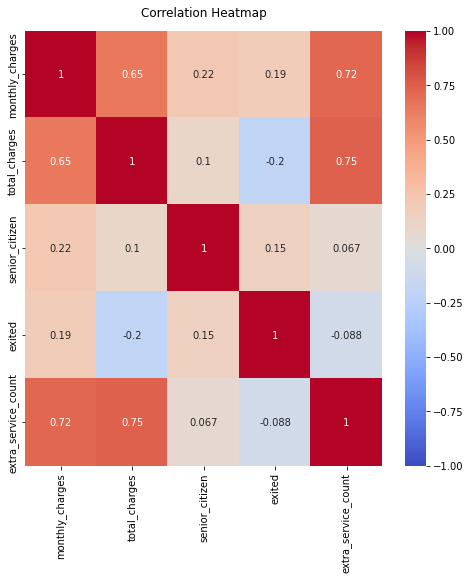

In [48]:
# Correlation matrix of features
plt.figure(figsize=(8,8))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=14);



There is a strong correlation between the number of extra services a customer has and the payment amount (monthly charges and total charges). 

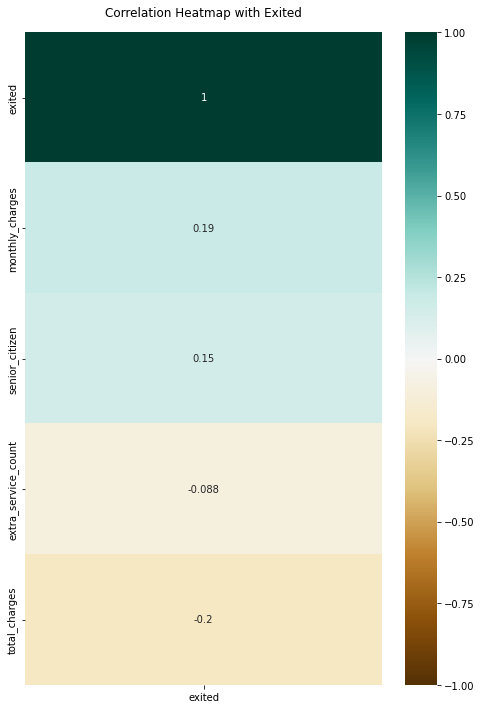

In [49]:
# Correlation of features with 'exited'
plt.figure(figsize=(8,12))

heatmap = sns.heatmap(df.corr()[['exited']].sort_values(by='exited', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap with Exited', fontdict={'fontsize':12}, pad=16);

From our correlation heatmap, we can see that there is a slight correlation between customer churn and monthly charges. We will now look at the different types of contract types.

### What is the most popular contract type?


In [50]:
# Counts of unique values per contract types
df['type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: type, dtype: int64

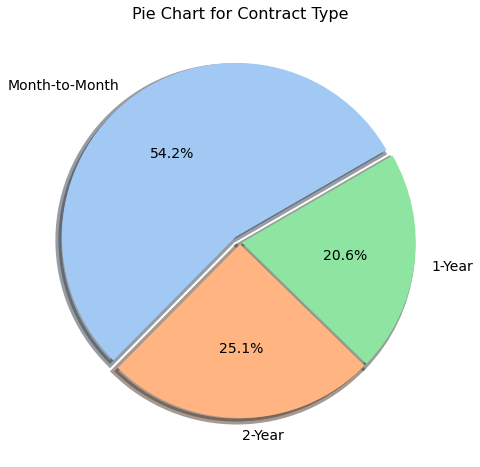

In [51]:
# Plotting pie chart 
fig = plt.figure(figsize=(10,8))

x = [3875, 1795, 1473]
labels = ['Month-to-Month', '2-Year', '1-Year']

colors = sns.color_palette('pastel')

plt.pie(x, labels=labels,
        autopct ='%.1f%%',
        shadow = True,
        colors = colors,
        explode = (0.04, 0.01, 0.01), 
        startangle = 30, 
        textprops = {'color': 'Black','fontsize':14}, 
        wedgeprops = {'linewidth': 6} )

plt.title('Pie Chart for Contract Type', fontsize=16)
plt.show()

The most popular contract type is a month-to-month payment, followed by a 2 year plan and a 1 year plan. Almost half of Interconnect's customers (54.2%) prefer a month-to-month payment plan. 

### Which contract plan brings in the most revenue?

In [52]:
# Total charges grouped by contract type
df.groupby(['type']).agg({'total_charges': 'mean'}).reset_index().round(2).sort_values(by='total_charges', ascending=False, ignore_index=True)

,type,total_charges
0,Two year,3715.18
1,One year,3033.57
2,Month-to-month,1369.25


The two-year contract plan brings in the most revenue, followed by the one-year plan and the month-to-month plan, respectively. 

### Which contract plan has the highest churn rate?

In [53]:
# Contract plan with the highest churn
df.groupby('type').agg({'exited':'sum'}).reset_index().sort_values(by='exited', ascending=False, ignore_index=True)

,type,exited
0,Month-to-month,1655
1,One year,166
2,Two year,48


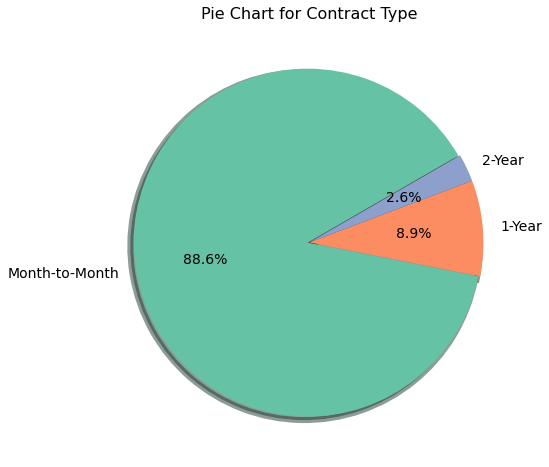

In [54]:
# Plotting pie chart 
fig = plt.figure(figsize=(8,8))

x = [1655, 166, 48]
labels = ['Month-to-Month', '1-Year', '2-Year']

colors = sns.color_palette('Set2')

plt.pie(x, labels=labels,
        autopct ='%.1f%%',
        shadow = True,
        colors = colors,
        explode = (0.01, 0, 0), 
        startangle = 30, 
        textprops = {'color': 'Black','fontsize':14}, 
        wedgeprops = {'linewidth': 6} )

plt.title('Pie Chart for Contract Type', fontsize=16)
plt.show()

Customer's with the month to month plan had the highest churn rate. This makes sense since it's easier for customer's to leave when they aren't tied down to yearly contracts. 

### Is there a relationship between the number of services a customer has and customer churn?


In [55]:
# Service count with the highest churn
df.groupby('extra_service_count').agg({'exited':'sum'}).reset_index().sort_values(by='exited', ascending=False, ignore_index=True)

,extra_service_count,exited
0,0,475
1,1,442
2,2,370
3,3,306
4,4,190
5,5,71
6,6,15


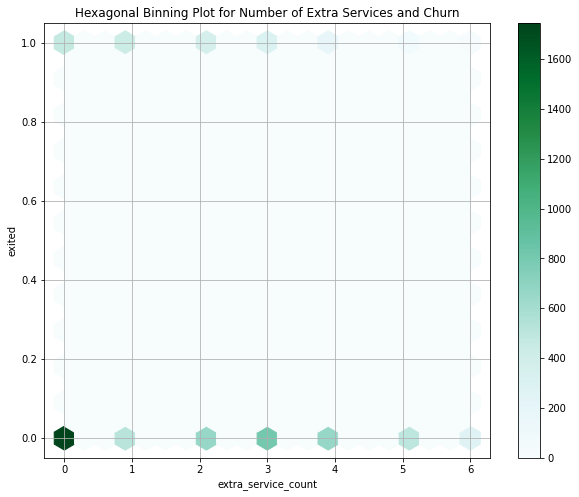

In [56]:
# Correlation of number of extra services and churn 
df.plot(x='extra_service_count', y='exited', title = 'Hexagonal Binning Plot for Number of Extra Services and Churn', 
    kind='hexbin', gridsize=20, figsize=(10, 8), sharex=False, grid=True)



A hexplot splits the plotting window into several hexbins and then the number of observations which fall into each bin corresponds with a color to indicate density. A darker hexbin means that there are more observations (or density) within that region. Customers that didn't have extra services (besides landline or internet) were more likely to end their subscription. The more additional services a customer had, the less likely they were able to end their subscription at Interconnect. 

### Is there a difference in churn rate between male customers and female customers?

In [57]:
df.groupby('gender').agg({'exited':'sum'}).reset_index().sort_values(by='exited', ascending=False)

,gender,exited
0,Female,939
1,Male,930


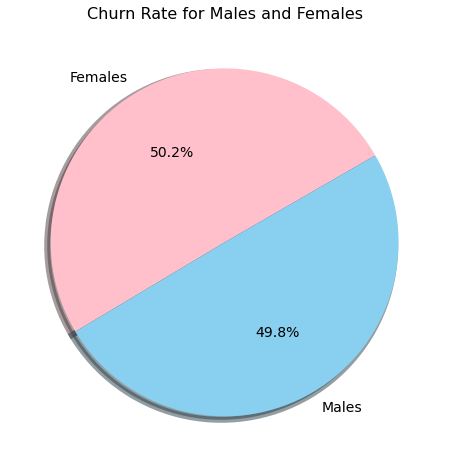

In [58]:
# Plotting pie chart 
fig = plt.figure(figsize=(10,8))

x = [939, 930]
labels = ['Females', 'Males']

colors = ["#FFC0CB", "#89CFF0"]

plt.pie(x, labels=labels,
        autopct ='%.1f%%',
        shadow = True,
        colors = colors,
        explode = (0.0, 0.0), 
        startangle = 30, 
        textprops = {'color': 'Black','fontsize':14}, 
        wedgeprops = {'linewidth': 6} )

plt.title('Churn Rate for Males and Females', fontsize=16)
plt.show()

There is only a slight difference between churn rate for female (50.2%) and male (49.8%) customers. This difference is not significant enough to make any conclusions. 

### Is there a high percentage of senior citizens leaving Interconnect?

In [59]:
# Counting number of senior citizens that churned
df.groupby('senior_citizen').agg({'exited':'sum'}).reset_index().sort_values(by='exited', ascending=False, ignore_index=True)

,senior_citizen,exited
0,0,1393
1,1,476


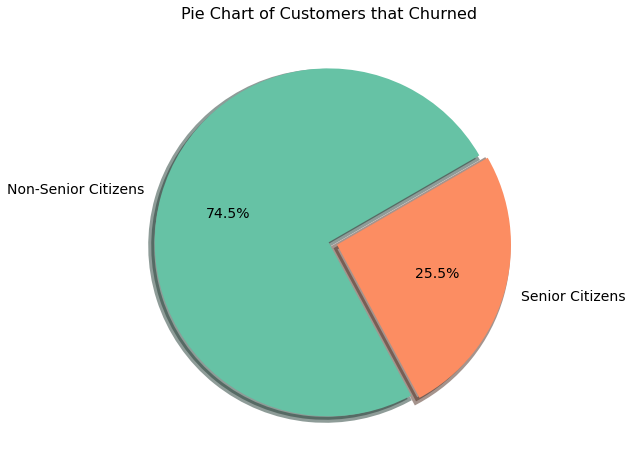

In [60]:
# Plotting pie chart 
fig = plt.figure(figsize=(10,8))

x = [1393, 476]
labels = ['Non-Senior Citizens', 'Senior Citizens']

colors = sns.color_palette('Set2')

plt.pie(x, labels=labels,
        autopct ='%.1f%%',
        shadow = True,
        colors = colors,
        explode = (0.0, 0.05), 
        startangle = 30, 
        textprops = {'color': 'Black','fontsize':14}, 
        wedgeprops = {'linewidth': 6} )

plt.title('Pie Chart of Customers that Churned', fontsize=16)
plt.show()

From our pie chart, we see that there is only a small percentage of senior citizens that leave Interconnect. The majority of customers that leave interconnect are not senior citizens. 

### Conclusion

From our exploratory data analysis, we can conclude the following:

* There is a correlation between the number of extra services a customer has and the payment amount that customers make.

* The month-to-month contract plan is the most popular contract type among Interconnect’s customers.

* The 2-year contract plan brings in the most revenue for Interconnect, followed by their 1-year plan and month-to-month plan.

* Customer’s with the month-to-month plan has the highest churn rate. 

* Customer’s that didn’t have extra services (besides landline or internet) were more likely to end their subscription. 

* There was no significant difference between the churn rate for female customers and male customers at Interconnect.

* The majority of customers that churned were not senior citizens.


## Working with Models

We will now train different classification models with the primary metric of evaluation being AUC-ROC. The ROC is a probabilty curve and the AUC represents the degress of separability. It tells us how much the model is capable of distingushing between classes. We will also use accuracy as an additional metric. 

### Feature Preparation



In [61]:
# Dropping unimportant features
df = df.drop(['customer_id', 'begin_date', 'end_date'], axis=1)

In [62]:
# Declaring variables for features and target
X = df.drop(['exited'], axis=1)
y = df['exited']

In [63]:
# Splitting data into 75% training and 25% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

When data is abundant, we have the chance of falling into the dummy trap feature. To avoid this, we will encode our categorical features.

In [64]:
# Declaring categorial variables
categorical = [cname for cname in X_train.columns if X_train[cname].dtypes == 'object']

In [65]:
# Copying training and test features
X_train_oe = X_train.copy()
X_test_oe = X_test.copy()

# Ordinal encoding
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train_oe[categorical])
X_train_oe[categorical] = ordinal_encoder.transform(X_train_oe[categorical])
X_test_oe[categorical] = ordinal_encoder.transform(X_test_oe[categorical])

In [66]:
# One-Hot Encoding
df_ohe = pd.get_dummies(df, drop_first=True)
X_ohe = df_ohe.drop(['exited'], axis=1)
y_ohe = df_ohe['exited']

# Splitting OHE features and target variables into 75% training and 25% test set
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.25, random_state=12345)

We will also standardize the numerical features.

In [67]:
# Declaring numerical variables
numerical = [cname for cname in X_train.columns if X_train[cname].dtypes in ['float64', 'int64']]

In [68]:
# Numerical feature scaling 
scaler = StandardScaler()
scaler.fit(X_train_ohe[numerical])
X_train_ohe[numerical] = scaler.transform(X_train_ohe[numerical])
X_test_ohe[numerical] = scaler.transform(X_test_ohe[numerical])

#### Conclusion 

We split our data into 75% training and 25% test set, and encoded the categorical features and standardized numerical features. Before we start training our model, we will define the evaluation metrics. 

### Examining the Balance of Classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


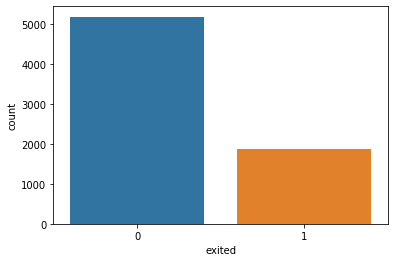

In [69]:
balance = sns.countplot(df['exited'])
plt.show()

We examined the balance of classes and see that there is a huge difference in dataset. There is roughly 5000 customers still with Interconnect  as compared to the 2000 that has ended their contract. 

We will now train a model without taking the imbalance of classes into account.

In [83]:
# K-Folds cross-validator

'''We are going to ensure that we have the same splits of the data every time. 
   We do this by creating a KFold object, kf, and passing cv=kf.'''

kf = KFold(n_splits=5, random_state=45, shuffle=True)

In [84]:
# Baseline model
rf = RandomForestClassifier(n_estimators=100, random_state=45)
cross_val_score(rf, X_train_oe, y_train, cv=kf, scoring='recall')


array([0.5083612 , 0.44876325, 0.475     , 0.51587302, 0.50533808])

We will now optimize the model by doing some hyperparameter tuning. 

In [105]:
# Tuning hyperparameters using GridSearchCV
grid = {
    'n_estimators': [50, 75, 100, 200],
    'max_depth': [4, 6, 10, 12, 25],
    'random_state': [45]
}

grid_no_up = GridSearchCV(rf, param_grid=grid, cv=kf, 
                          scoring='recall').fit(X_train_oe, y_train)

# Recall score on validation set
grid_no_up.best_score_

0.5119669583736528

We have about 51% recall our validation set. This is the number to beat. We will now see if the quality of the model improves by fixing class imbalance with oversampling. Let's make sure that the test scores are in line with what we expect from the CV scores (i.e. about 51%).

In [103]:
# Getting recall score for test set
recall_score(y_test, grid_no_up.predict(X_test_oe))

0.5042194092827004

This looks like is is roughly consistent with the CV results. 

#### Oversampling (Upsampling)

Using upsampling, we synthetically generate data points (corresponding to minority class) to inject into the dataset. After this process, the counts of both labels are almost the same.

In [100]:
# SMOTE (Synthetic Minority Oversampling Technique) 

'''This technique works by randomly picking a point from the minority class and 
   computing the k-nearest neighbors for this point. The synthetic points are 
   added between the chosen point and its neighbors.'''

# Creating imblearn's pipeline
imba_pipeline = make_pipeline(SMOTE(random_state=45), 
                              RandomForestClassifier(n_estimators=100, random_state=45))
cross_val_score(imba_pipeline, X_train_oe, y_train, scoring='recall', cv=kf)
                            

array([0.50167224, 0.48409894, 0.49285714, 0.52380952, 0.51601423])

In [106]:
# Tuning hyperparameters with GridSearchCV using the imblearn pipeline we created
new_params = {'randomforestclassifier__' + key: grid[key] for key in grid}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_imba.fit(X_train_oe, y_train)

# Recall score of validation set after upsampling 
grid_imba.best_score_

0.7384093538269525

In [107]:
# Recall score of test set after upsampling
y_test_predict = grid_imba.predict(X_test_oe)
recall_score(y_test, y_test_predict)

0.7383966244725738

We can see that both recall scores for the validation and test set improved after upsampling. Here is a summary of the different approaches we took:

| Method | Recall (validation) | Recall (test) |
| --- | --- | --- |
| No upsampling (baseline) | 51.2% | 50.4% |
| Upsampling as part of CV (pipeline) | 73.8% | 73.8% |


We will now define a function for upsampling and use it to to define our training samples as a means of creating class balance before training our models. 

In [110]:
# Defining function for upsampling
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


#  Creating new training sample
features_upsampled, target_upsampled = upsample(X_train_ohe, y_train_ohe, 3)

# Checking to see if our classes are more balanced 
target_upsampled.value_counts()

1    4185
0    3887
Name: exited, dtype: int64

In [111]:
# Defining training samples with upsampling for class balance

# Upsampled training dataset
X_train_upsampled, y_train_upsampled = upsample(X_train, y_train, 3)

# Upsampled training dataset for ordinal encoded data
X_train_oe_upsampled, y_train_oe_upsampled = upsample(X_train_oe, y_train, 3)

# Upsampled training dataset for one-hot encoded data
X_train_ohe_upsampled, y_train_ohe_upsampled = upsample(X_train_ohe, y_train_ohe, 3)

### Defining Evaluation Metrics


In [73]:
# Function to evaluate classification models
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    plt.style.use('seaborn') 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return


In [74]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred):
  
  ## Generating the confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  
  ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

  ax.set_title('Confusion Matrix');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels 
  ax.xaxis.set_ticklabels(["Didn't Churn",'Churned'])
  ax.yaxis.set_ticklabels(["Didn't Churn", 'Churned'])

  ## Display the visualization of the Confusion Matrix
  plt.show()


### Model Training

#### Model 0 - Constant

In [75]:
%%time 

# Dummy classifier model
dummy = DummyClassifier(constant=None, random_state=12345, strategy='most_frequent')
dummy.fit(X_train_upsampled, y_train_upsampled)

CPU times: user 1.02 ms, sys: 1 µs, total: 1.02 ms
Wall time: 1.03 ms


          train  test
Accuracy   0.52  0.27
F1         0.68  0.42
APS        0.52  0.27
ROC AUC    0.50  0.50


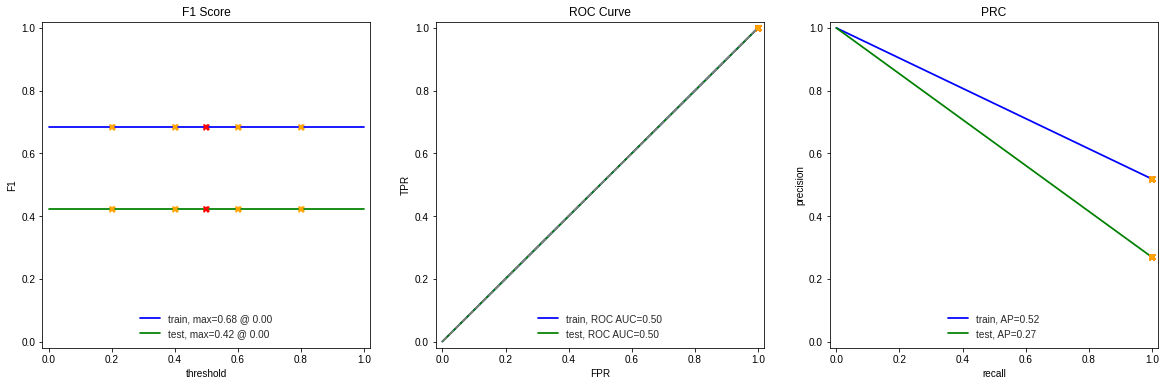

In [76]:
# Evaluating model
evaluate_model(dummy, X_train_upsampled, y_train_upsampled, X_test, y_test)

This represents our baseline model. We will use these metrics and visuals to compare our model performances. 

#### Model 1 - Logistic Regression 

In [77]:
%%time

# Creating linear regression pipeline
lr_pipeline = Pipeline(steps=[('logistic_regression', LogisticRegression(random_state=12345))])
lr_pipeline.fit(X_train_ohe_upsampled, y_train_ohe_upsampled)

CPU times: user 181 ms, sys: 141 ms, total: 321 ms
Wall time: 362 ms


          train  test
Accuracy   0.76  0.73
F1         0.78  0.62
APS        0.83  0.63
ROC AUC    0.84  0.84
CPU times: user 394 ms, sys: 117 ms, total: 511 ms
Wall time: 434 ms


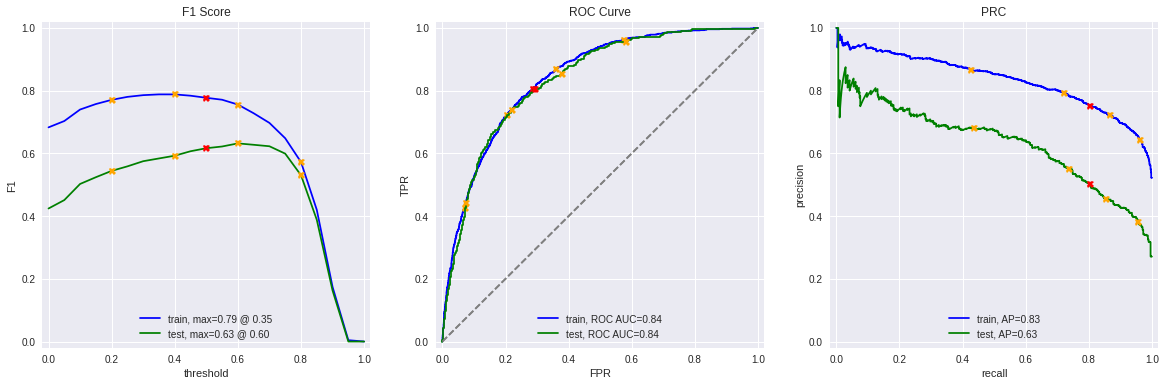

In [78]:
%%time 

# Evaluating model
evaluate_model(lr_pipeline, X_train_ohe_upsampled, y_train_ohe_upsampled, X_test_ohe, y_test)

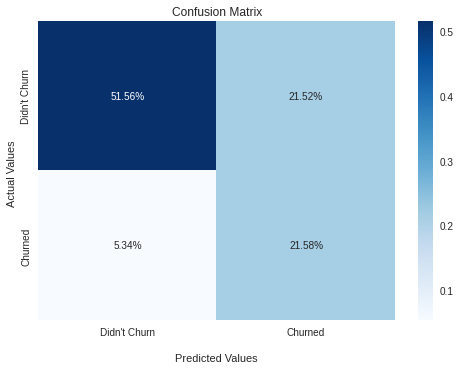

In [79]:
# Plotting confusion matrix for logistic regression
lr_pred = lr_pipeline.predict(X_test_ohe)
plot_confusion_matrix(y_test, lr_pred)

#### Model 2 - Decision Tree Classifier

In [80]:
%%time 

# Defining hyperparameters to tune
dtc_grid = {'criterion': ['gini', 'entropy'], 
            'max_depth': [2, 4, 6, 8, 10, 12], 
            'max_leaf_nodes': list(range(2, 16)), 
            'min_samples_split': [2, 3, 4]
            }

# Decision tree classifier model
dtc = DecisionTreeClassifier(random_state=12345)

# Grid search
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=dtc_grid, scoring='roc_auc', cv=7)
grid_search_dtc.fit(X_train_oe_upsampled, y_train_oe_upsampled)
print('The best hyperparameters are: {}'.format(grid_search_dtc.best_params_))

The best hyperparameters are: {'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 15, 'min_samples_split': 2}
CPU times: user 1min 20s, sys: 642 ms, total: 1min 21s
Wall time: 1min 31s


In [81]:
%%time

# Creating decision tree classifier pipeline
dtc_pipeline = Pipeline(steps=[('desc_tree_class', DecisionTreeClassifier(random_state=12345, criterion='entropy', max_depth=6, max_leaf_nodes=15, min_samples_split=2))])
dtc_pipeline.fit(X_train_oe_upsampled, y_train_oe_upsampled)


CPU times: user 25.3 ms, sys: 0 ns, total: 25.3 ms
Wall time: 25.4 ms


          train  test
Accuracy   0.76  0.73
F1         0.78  0.61
APS        0.81  0.58
ROC AUC    0.84  0.82
CPU times: user 256 ms, sys: 1.94 ms, total: 258 ms
Wall time: 266 ms


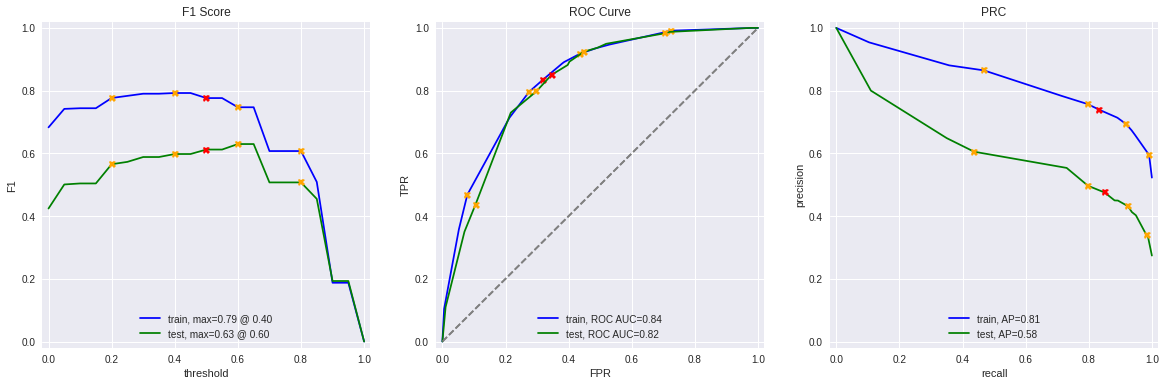

In [82]:
%%time

# Evaluating model
evaluate_model(dtc_pipeline, X_train_oe_upsampled, y_train_oe_upsampled, X_test_oe, y_test)

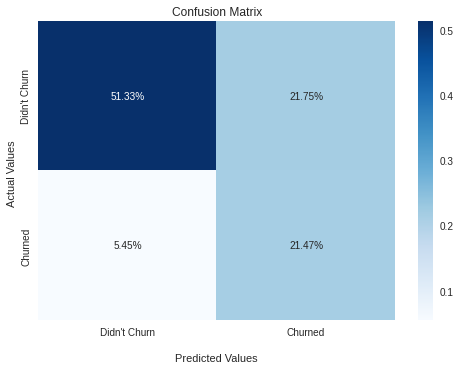

In [83]:
# Plotting confusion matrix for decision tree classifier
dtc_pred = dtc_pipeline.predict(X_test_oe)
plot_confusion_matrix(y_test, dtc_pred)

#### Model 3 - Random Forest Classifier

In [84]:
%%time 

# Defining hyperparameters to tune
rfc_grid = {'n_estimators': [25, 50, 75, 100], 
            'max_depth' : [4,5,6,7,8], 
            'min_samples_split': [2, 3, 4], 
            'criterion' :['gini', 'entropy']
            }

# Random forest classifier model
rfc = RandomForestClassifier(random_state=12345)

# Grid search
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=rfc_grid, scoring='roc_auc', cv=7)
grid_search_rfc.fit(X_train_oe_upsampled, y_train_oe_upsampled)
print('The best hyperparameters are: {}'.format(grid_search_rfc.best_params_))

The best hyperparameters are: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100}
CPU times: user 4min 51s, sys: 1.26 s, total: 4min 52s
Wall time: 4min 53s


In [85]:
%%time

# Creating a random forest classifier pipeline
rfc_pipeline = Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=12345, criterion='gini', max_depth=8, min_samples_split=2, n_estimators=100))])
rfc_pipeline.fit(X_train_oe_upsampled, y_train_oe_upsampled)

CPU times: user 653 ms, sys: 8 ms, total: 661 ms
Wall time: 658 ms


          train  test
Accuracy   0.83  0.74
F1         0.85  0.63
APS        0.90  0.64
ROC AUC    0.91  0.84
CPU times: user 516 ms, sys: 3.04 ms, total: 519 ms
Wall time: 521 ms


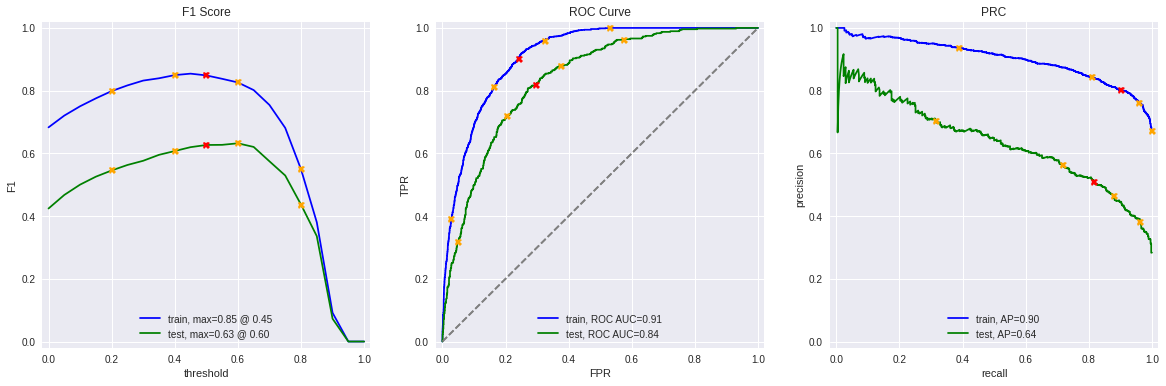

In [86]:
%%time

# Evaluating model 
evaluate_model(rfc_pipeline, X_train_oe_upsampled, y_train_oe_upsampled, X_test_oe, y_test)

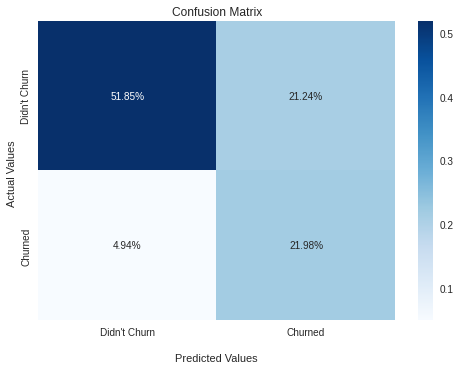

In [87]:
# Plotting confusion matrix for random forest classifier
rfc_pred = rfc_pipeline.predict(X_test_oe)
plot_confusion_matrix(y_test, rfc_pred)

#### Model 4 - LightGBM Classifier

In [88]:
%%time 

# Defining hyperparameters to tune
lgbm_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }


# LightGBM classifier model
lgbm = LGBMClassifier(random_state=12345)

# Grid search
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=lgbm_grid, scoring='roc_auc', cv=7)
grid_search_lgbm.fit(X_train_oe_upsampled, y_train_oe_upsampled)
print('The best hyperparameters are: {}'.format(grid_search_lgbm.best_params_))

The best hyperparameters are: {'lambda_l1': 0, 'lambda_l2': 0, 'min_data_in_leaf': 30, 'num_leaves': 127, 'reg_alpha': 0.1}
CPU times: user 5min 58s, sys: 15.9 s, total: 6min 14s
Wall time: 3min 15s


In [89]:
%%time

# Creating a LightGBM classifier pipeline
lgbm_pipeline = Pipeline(steps=[('lgbm', LGBMClassifier(random_state=12345, lambda_l1=0, lambda_l2=0, min_data_in_leaf=30, num_leaves=127, reg_alpha=0.1))])
lgbm_pipeline.fit(X_train_oe_upsampled, y_train_oe_upsampled)

CPU times: user 953 ms, sys: 56.9 ms, total: 1.01 s
Wall time: 555 ms


          train  test
Accuracy   0.97  0.76
F1         0.97  0.60
APS        1.00  0.60
ROC AUC    1.00  0.81
CPU times: user 630 ms, sys: 2.93 ms, total: 633 ms
Wall time: 449 ms


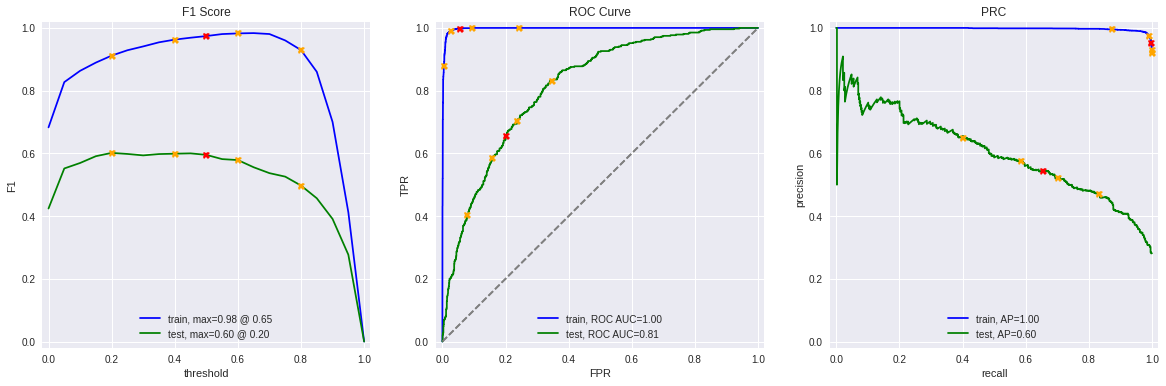

In [90]:
%%time 

# Evaluating model
evaluate_model(lgbm_pipeline, X_train_oe_upsampled, y_train_oe_upsampled, X_test_oe, y_test)

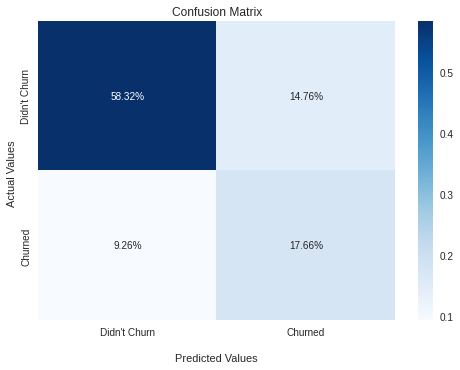

In [91]:
# Plotting confusion matrix for LightGBM classifier
lgbm_pred = lgbm_pipeline.predict(X_test_oe)
plot_confusion_matrix(y_test, lgbm_pred)

#### Model 5 - XGBoost Classifier

In [92]:
%%time 

# Defining hyperparameters to tune
xgb_grid = {
        'learning_rate': [0.001, 0.01, 0.1, 0.2], 
        'max_depth': [2, 4, 7, 10],
        'n_estimators': [50, 75, 100, 200]
        }


# XGBoost classifier model
xgb = XGBClassifier(random_state=12345)

# Grid search
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=xgb_grid, scoring='roc_auc', cv=7)
grid_search_xgb.fit(X_train_ohe_upsampled, y_train_ohe_upsampled)
print('The best hyperparameters are: {}'.format(grid_search_xgb.best_params_))


The best hyperparameters are: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}
CPU times: user 8min 16s, sys: 2.04 s, total: 8min 18s
Wall time: 8min 16s


In [93]:
%%time

# Creating a XGBoost classifier pipeline
xgb_pipeline = Pipeline(steps=[('xgb', XGBClassifier(random_state=12345, learning_rate=0.2, max_depth=10, n_estimators=200))])
xgb_pipeline.fit(X_train_ohe_upsampled, y_train_ohe_upsampled)

CPU times: user 3.5 s, sys: 13 ms, total: 3.51 s
Wall time: 3.49 s


          train  test
Accuracy    1.0  0.76
F1          1.0  0.56
APS         1.0  0.60
ROC AUC     1.0  0.80
CPU times: user 645 ms, sys: 17 µs, total: 645 ms
Wall time: 640 ms


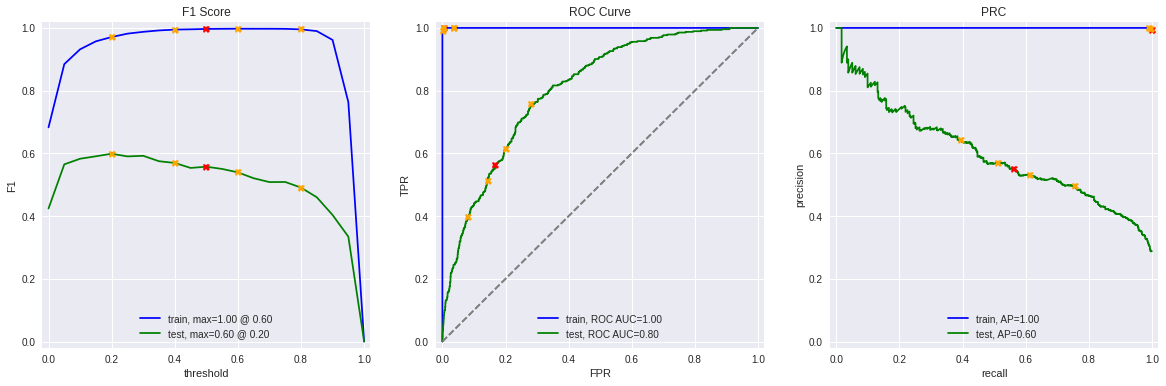

In [94]:
%%time 

# Evaluating model
evaluate_model(xgb_pipeline, X_train_ohe_upsampled, y_train_ohe_upsampled, X_test_ohe, y_test)

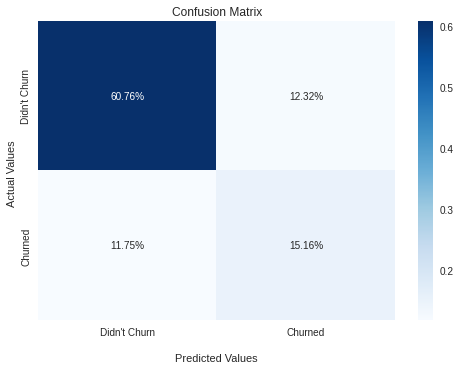

In [95]:
# Plotting confusion matrix for XGBoost classifier
xgb_pred = xgb_pipeline.predict(X_test_ohe)
plot_confusion_matrix(y_test, xgb_pred)

#### Model 6 - CatBoost Classifier

In [97]:
%%time 

# Defining hyperparameters to tune
cb_grid = {'depth': [4, 5, 6, 7, 8, 9, 10], 
           'learning_rate' : [0.01, 0.02, 0.03, 0.04], 
           'iterations'    : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
           'l2_leaf_reg': [1, 3, 5, 7, 9]
           }


# CatBoost classifier model
cb = CatBoostClassifier(random_state=12345, cat_features = categorical, early_stopping_rounds=50, logging_level='Silent', eval_metric='AUC')

# Grid search
grid_search_cb = GridSearchCV(estimator=cb, param_grid=cb_grid, scoring='roc_auc', cv=7)
grid_search_cb.fit(X_train_upsampled, y_train_upsampled)
print('The best hyperparameters are: {}'.format(grid_search_cb.best_params_))


The best hyperparameters are: {'depth': 10, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.04}
CPU times: user 1h 51min 29s, sys: 5min 54s, total: 1h 57min 24s
Wall time: 1h 12min 10s


In [102]:
%%time

# Creating a CatBoost classifier model
cat = CatBoostClassifier(random_state=12345, cat_features=categorical, depth=10, iterations=100, learning_rate=0.04, l2_leaf_reg=1)
cat.fit(X_train_upsampled, y_train_upsampled, eval_set=(X_test, y_test))

0:	learn: 0.6804749	test: 0.6810522	best: 0.6810522 (0)	total: 23.1ms	remaining: 2.28s
1:	learn: 0.6680516	test: 0.6697743	best: 0.6697743 (1)	total: 49.5ms	remaining: 2.43s
2:	learn: 0.6586931	test: 0.6612482	best: 0.6612482 (2)	total: 55.2ms	remaining: 1.78s
3:	learn: 0.6480039	test: 0.6516540	best: 0.6516540 (3)	total: 76.6ms	remaining: 1.84s
4:	learn: 0.6380425	test: 0.6428198	best: 0.6428198 (4)	total: 97.3ms	remaining: 1.85s
5:	learn: 0.6288880	test: 0.6345142	best: 0.6345142 (5)	total: 120ms	remaining: 1.88s
6:	learn: 0.6209907	test: 0.6272591	best: 0.6272591 (6)	total: 131ms	remaining: 1.74s
7:	learn: 0.6139502	test: 0.6207075	best: 0.6207075 (7)	total: 137ms	remaining: 1.58s
8:	learn: 0.6063415	test: 0.6147016	best: 0.6147016 (8)	total: 158ms	remaining: 1.6s
9:	learn: 0.5987556	test: 0.6080164	best: 0.6080164 (9)	total: 179ms	remaining: 1.61s
10:	learn: 0.5915382	test: 0.6023149	best: 0.6023149 (10)	total: 199ms	remaining: 1.61s
11:	learn: 0.5844816	test: 0.5966957	best: 0.596

          train  test
Accuracy   0.84  0.74
F1         0.86  0.62
APS        0.91  0.65
ROC AUC    0.91  0.84
CPU times: user 443 ms, sys: 24.9 ms, total: 468 ms
Wall time: 521 ms


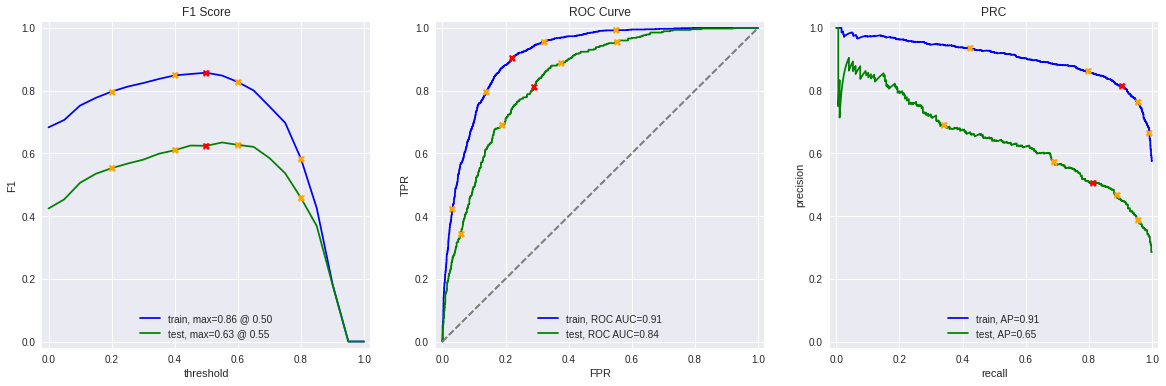

In [103]:
%%time 

# Evaluating model
evaluate_model(cat, X_train_upsampled, y_train_upsampled, X_test, y_test)

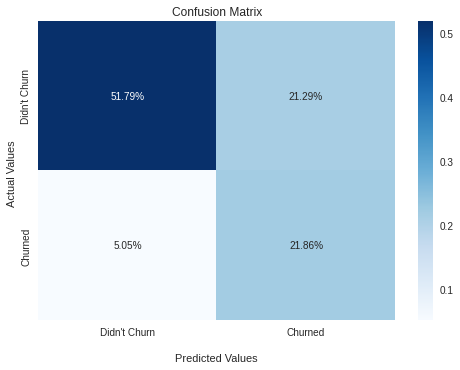

In [104]:
# Plotting confusion matrix for CatBoost classifier
cat_pred = cat.predict(X_test)
plot_confusion_matrix(y_test, cat_pred)

## Model Analysis

In [107]:
# Creating dataframe to compare diffent performance of models 
model = ['Logistic Regression', ' Decision Tree Classifier', 'Random Forest Classifier', 'LightGBM Classifier', 'XGBoost Classifier', 'CatBoost Classifier']
accuracy = [0.73, 0.73, 0.74, 0.76, 0.76, 0.74]
ROC_AUC = [0.84, 0.82, 0.84, 0.81, 0.80, 0.84]
tune_time = [0, 91, 293, 195, 496, 4330]
model_time = [.362, .0254, .658, .555, 3.49, 2.19]
models = pd.DataFrame(data = zip(model, accuracy, ROC_AUC, tune_time, model_time), columns = ['model', 'accuracy_score', 'ROC_AUC', 'hyperparameter_tuning_time(s)', 'model_run_time(s)'])

display(models)


,model,accuracy_score,ROC_AUC,hyperparameter_tuning_time(s),model_run_time(s)
0,Logistic Regression,0.73,0.84,0,0.3620
1,Decision Tree Classifier,0.73,0.82,91,0.0254
2,Random Forest Classifier,0.74,0.84,293,0.6580
3,LightGBM Classifier,0.76,0.81,195,0.5550
4,XGBoost Classifier,0.76,0.80,496,3.4900
5,CatBoost Classifier,0.74,0.84,4330,2.1900


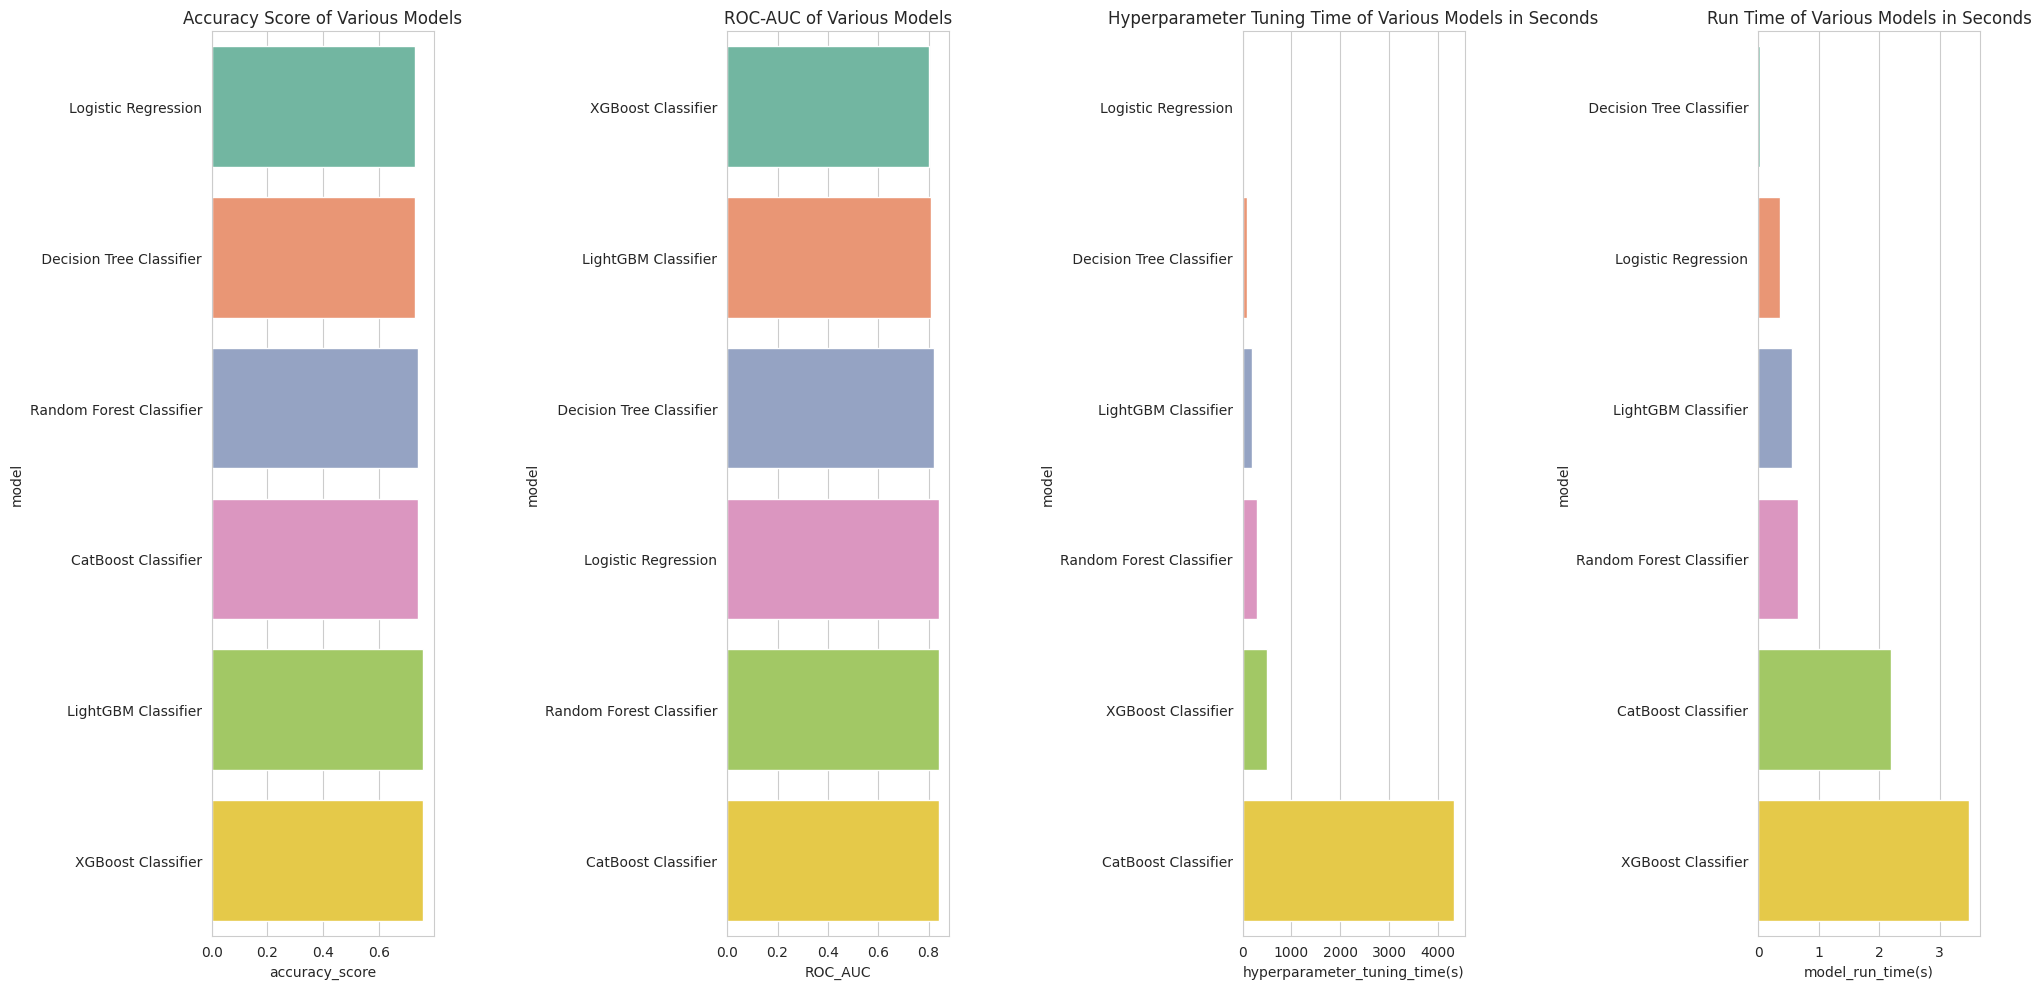

In [177]:
# Plotting performance metrics
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 4, figsize=(20,10))

sns.barplot(data = models.sort_values('accuracy_score'), 
            y = 'model',
            x = 'accuracy_score',
            orient = 'h', 
            palette ='Set2', 
            ax=ax[0])
ax[0].set_title('Accuracy Score of Various Models')

sns.barplot(data = models.sort_values('ROC_AUC'), 
            y = 'model',
            x = 'ROC_AUC',
            orient = 'h', 
            palette ='Set2', 
            ax=ax[1])
ax[1].set_title('ROC-AUC of Various Models')


sns.barplot(data = models.sort_values('hyperparameter_tuning_time(s)'), 
            y = 'model',
            x = 'hyperparameter_tuning_time(s)',
            orient = 'h',
            palette = 'Set2', 
            ax = ax[2])
ax[2].set_title('Hyperparameter Tuning Time of Various Models in Seconds')

sns.barplot(data=models.sort_values(by='model_run_time(s)'),
            y ='model',
            x = 'model_run_time(s)', 
            orient = 'h', 
            palette = 'Set2', 
            ax = ax[3])
ax[3].set_title('Run Time of Various Models in Seconds')

plt.tight_layout()
plt.show()

### Conclusion 

The logistic regression, random forest classifier, and CatBoost classifier model obtained the highest ROC-AUC score. Each of these models obtained a score of 0.84. The accuracy score between the three models varied between 0.73 and 0.74, respectively. The model that scored the lowest in terms of ROC-AUC was the XGBoost classifier. Out of the three models with the highest ROC-AUC score, the CatBoost model took the longest time to tune the hyperparameters. It took roughly an hour to tune, while the random forest model took around 5 minutes to tune. Hyperparameters were not tuned for the logistic regression model. The time it took to train the models also varied. The logistic regression took the least time to fit at .362 seconds, followed by the random forest model (.658 seconds) and the CatBoost model (2.19 seconds). When taking into consideration the time it took to tune hyperparameters and train the model, the random forest classifier performed the best. We will use the random forest classifier to perform final testing on the test dataset. 

## Final Testing

In [112]:
# Random forest classifier model 
final_model = RandomForestClassifier(random_state=12345, criterion='gini', max_depth=8, min_samples_split=2, n_estimators=100)
final_model.fit(X_train_oe_upsampled, y_train_oe_upsampled)
test_pred = final_model.predict(X_test_oe)

# Calculating ROC-AUC
roc_auc = roc_auc_score(y_test, final_model.predict_proba(X_test_oe)[:, 1])
print('ROC-AUC:', round(roc_auc, 2))

# Calculating accuracy score 
accuracy = accuracy_score(y_test, test_pred)
print('Accuracy:', accuracy)

# Calculating F1 score
f1_score = f1_score(y_test, test_pred)
print('F1 score:', f1_score)

# Calculating precision 
precision = precision_score(y_test, test_pred)
print('Precision score:', precision)

# Calculating recall
recall = recall_score(y_test, test_pred)
print('Recall score:', recall)

ROC-AUC: 0.84
Accuracy: 0.7382169222032936
F1 score: 0.6267206477732794
Precision score: 0.5085413929040736
Recall score: 0.8164556962025317


AUC-ROC Score: 0.8381731957681323


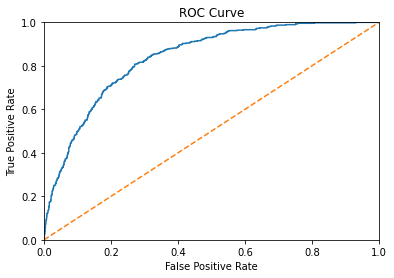

In [113]:
#ROC Curve
probabilities_test = final_model.predict_proba(X_test_oe)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test)

# Plotting the graph
plt.figure()
plt.plot(fpr,tpr)

# ROC curve for a random model (looks like straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

# Setting boundaries for the axes from 0 to 1
plt.xlim([0,1])
plt.ylim([0,1])

# Adding title and axes label
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#Roc-Auc Score
print('AUC-ROC Score:', roc_auc_score(y_test, probabilities_one_test))

Since our AUC score is close to 1, we can say that our model has a good measure of separability. There is a ~84% chance that our model is able to distinguist between positive class and negative class. Our ROC curve shows that the true positive and true negatives curves don’t overlap at all. This means that model has an ideal measure of separability. It is perfectly able to distinguish between positive class and negative class.

In [114]:
# Classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1287
           1       0.51      0.82      0.63       474

    accuracy                           0.74      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.80      0.74      0.75      1761



**Precision** is the accuracy of positive predictions. Our model had a precision of 91% for class 0 (those still with Interconnect) and 51% for class 1 (those that churned). 

**Recall** is the fraction of positives that were correctly identified. Our model had a recall score of 71% for class 0 and 82% for class 1. 

The **F1 score** is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Our model had a F1 score of .80 for class 0 and a score of .63 for class 1. 

The **support** is the number of occurence of the given class in your dataset (so we have 1287 of class 0 and 474 of class 1). 

[[913 374]
 [ 87 387]]



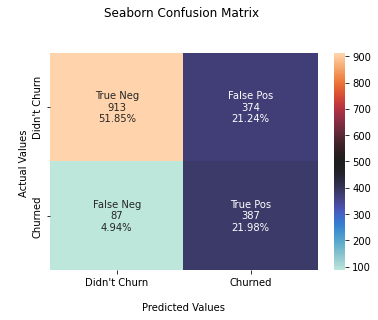

In [115]:
# Generating the confusion matrix
cf_matrix = confusion_matrix(y_test, test_pred)
print(cf_matrix)

print()

# Plotting confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='icefire')

ax.set_title('Seaborn Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Didn't Churn",'Churned'])
ax.yaxis.set_ticklabels(["Didn't Churn",'Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()

**True Positive:**

Interpretation: We predicted postive and it's true. We predicted that 21.98% of customers churned and they did churn. <br/><br/>


**True Negative:**

Interpretation: We predicted negative and it's true. We predicted that 51.85% of customers did not churn and they didn't churn. <br/><br/> 

**False Positive: (Type 1 Error)**

Interpretation: We predicted positve and it's false. We predicted that 21.24% of customers did churn, but they did not actually churn. <br/><br/>

**False Negative: (Type 2 Error)**

Interpretation: We predicted negative and it's false. We predicted that 4.94% of customers did not churn but they actually did churn.


Text(0.5, 0, '\nRandom Forest Feature Importance')

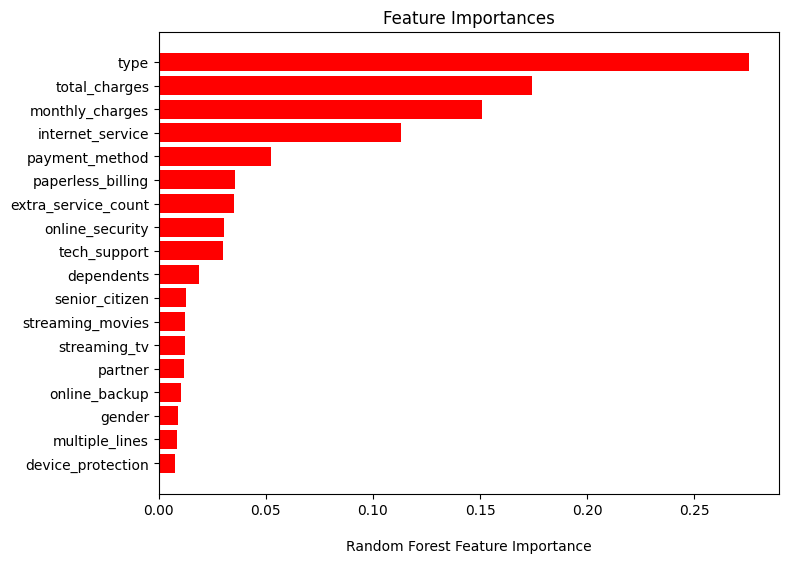

In [116]:
# Plotting feature importances

'''This gives us the opportunity to analyze what contributed to the accuracy of the model and what features were just noise'''

sorted_idx = final_model.feature_importances_.argsort()
plt.rcdefaults()
plt.figure(figsize=(8,6))
plt.barh(X_train_oe_upsampled.columns[sorted_idx], final_model.feature_importances_[sorted_idx], color="r", align="center")
plt.title("Feature Importances")
plt.xlabel("\nRandom Forest Feature Importance")


### Conclusion

Using the random forest classifier, we obtained an accuracy score of 73.8 % and an AUC-ROC score of 0.84 for the test set. From the plot of feature importances, we see that the top five most important features are the `type`, `total_charges`, `monthly_charges`, `internet_service`, and `payment_method`.


## Findings

From our exploratory data analysis, we concluded that:

* There is a correlation between the number of extra services a customer has and the payment amount that customers make (monthly payments and total charges).

* The month-to-month contract plan is the most popular contract type among Interconnect’s customers. Over half of their customers (~54.2%) has a month-to-month contract plan. The second most popular plan is the 2-year contract followed by the 1-year plan. 

* The 2-year contract plan brings in the most revenue for Interconnect, followed by their 1-year plan and month-to-month plan.

* Customers with the month-to-month plan have the highest churn rate. This makes sense since it’s easier for customers to leave when they aren’t bounded by yearly contracts. 

* Customers that didn’t have extra services (besides landline or internet), such as online security, online backup, device protection, tech support, and streaming services, were more likely to end their subscription. The more services a customer had on their plan, the less likely it was that they would end their subscription at Interconnect. 

* There is no significant difference between the churn rate for female customers and male customers at Interconnect.

* The majority of customers that churned were not senior citizens. The percentage of non-senior citizens that churned was roughly 74.5% as compare to the 25.5% of senior citizens that churned. 

**Recommendations:**

* The marketing team at Interconnect can do more promotional events for the 2-year contract plan as a means of enticing customers to stay with Interconnect. 

  * The 2-year plan also generated the most revenue for Interconnect.

* Promos should be done to get more customers to sign up for the extra services that Interconnect offer: online security, online backup, device protection, tech support, and streaming services.

  * The more services a customer had on their plan, the less likely it was that the customer ended their subscription. 

* Promotional activities should be targeted more towards the non-senior citizen audience (customers under 65). 

* Provide ample and versatile content about the key functional benefits of your product and offer regular news updates, such as announcements of deals, special offers or upcoming upgrades.<br/><br/>

Before training  our classification models, we split the data into 75% training and 25% test set. We encoded categorical features using ordinal encoding and one-hot encoding, and standardized numerical features. After examining class balance for our target, we noticed as huge difference in dataset. There was about 5000 customers still with Interconnect as compared to the 2000 that churned. We created a baseline model to compare the recall scores of the validation and test set before and after upsampling. We noticed an improvement in recall scores after upsampling, and created training samples with upsampling for class balance before training. Our primary metric for evaluation was the ROC-AUC score. <br/><br/>


We trained 6 different models (logistic regression, decision tree classifier, random forest classifier, LightGBM classifier, XGBoost classifier, and the CatBoost classifier) and used a dummy classifier model as our baseline model. The logistic regression, random forest classifier, and CatBoost classifier model obtained the highest ROC-AUC score. Each of these models obtained a score of 0.84. The accuracy score between the model varied from 0.73 and 0.74, respectively. The model that scored the lowest ROC-AUC score was the XGBoost classifier (0.80). Out of the three models with the highest ROC-AUC score, the CatBoost model took the longest time to tune the hyperparameters. It took a little over an hour to tune the CatBoost model. The random forest model took around 5 minutes to tune. Hyperparameters were not tuned for the logistic regression model. The time it took to train the models also varied. The logistic regression took the least time to train at .362 seconds, followed by the random forest model (.658 seconds) and the CatBoost model (2.19 seconds). When taking into consideration the time it took to tune hyperparameters and train the model, the random forest classifier performed the best. <br/><br/>


We performed final testing on our test set using the random forest classifier model and obtained a AUC score of ~84%. Since the AUC score was close to 1, we were able to say that our model had a good measure of separability. We also analyzed what contributed to the accuracy of the model and what features were just noise by plotting the feature importance for our final model. We found that the top five most important features to random forest classifier model was: ` type`, `total_charges`, `monthly_charges`, `internet_service`, and `payment_method`. <br/><br/>


**A summary of the models trained is summarized below:**

| Model | Accuracy | ROC-AUC | Hyperparameter Tuning Time (sec) | Model Run Time (sec) |
| --- | ---| --- | --- | --- | 
| Logistic Regression |	0.73 |	0.84 | 0 | 0.3620 |
| Decision Tree Classifier | 	0.73 |	0.82 |	91 |	0.0254 |
| Random Forest Classifier |	0.74 |	0.84 |	293 |	0.6580 |
| LightGBM Classifier |	0.76 |	0.81 |	195 |	0.5550 |
| XGBoost Classifier |	0.76 |	0.80 |	496 |	3.4900 |
| CatBoost Classifier |	0.74 |	0.84 |	4330 |	2.190 |